In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vnl-men-2023/VNL2023.csv


Análise exploratória de dados e algoritmo de classificação/regressão.

Mean CV score: 0.9088319088319088

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**Criando o dataframe
**

In [4]:
df = pd.read_csv("/kaggle/input/vnl-men-2023/VNL2023.csv")

**Visualizing the original dataframe**

In [5]:
#Visualizing the original dataframe
df

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH
...,...,...,...,...,...,...,...,...,...,...
126,Graven Leonard,Germany,19,0.00,0.00,0.00,0.00,5.92,1.92,L
127,Balaso Fabio,Italy,28,0.00,0.00,0.00,0.00,10.00,5.00,L
128,Nacsimento Maique Reis,Brazil,26,0.00,0.00,0.00,0.00,5.08,2.46,L
129,Garcia Alvarez Yonder Roman,Cuba,30,0.00,0.00,0.00,0.00,4.25,3.25,L


**Verificar tipos de dados, valores únicos e nulos**

In [6]:
# Verificar tipos de dados
print("Tipos de dados:")
print(df.dtypes)

# Verificar valores únicos em cada coluna
for coluna in df.columns:
    print(f"\nValores únicos em {coluna}:")
    print(df[coluna].unique())

# Verificar se há valores não numéricos nas colunas que deveriam ser numéricas
colunas_numericas = ['Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig', 'Receive']
for coluna in colunas_numericas:
    nao_numericos = df[pd.to_numeric(df[coluna], errors='coerce').isna()]
    if len(nao_numericos) > 0:
        print(f"\nValores não numéricos em {coluna}:")
        print(nao_numericos[coluna])

Tipos de dados:
Player       object
Country      object
Age           int64
Attack      float64
Block       float64
Serve       float64
Set         float64
Dig         float64
Receive     float64
Position     object
dtype: object

Valores únicos em Player:
['Ichikawa Yuki' 'Romano Yuri' 'Abdel-Aziz Nimir' 'Herrera Jaime Jesus'
 'Takahashi Ran' 'Luburic Drazen' 'Urnaut Tine' 'Zhang Jingyin'
 'Souza Alen' 'Souza Ricardo Lucarelli' 'Palonsky Luciano'
 'Lopez Castro Miguel Angel' 'Cebulj Klemen' 'Defalco Torey' 'Mozic Rok'
 'Anderson Matthew' 'Weber Linus' 'Kujundzic Miran ' 'Nishida Yuji'
 'Lima Bruno' 'Maar Stephen Timothy' 'Miyaura Kento'
 'Michieletto Alessandro' 'Nikolov Aleksandar' 'Sclater Ryan Joseph'
 'Vicentin Luciano ' 'Leon Venero Wilfredo' 'Lavia Daniele'
 'Reichert Moritz' 'Loser Agustin' 'Van Garderen Maarten'
 'Atanasov Martin' 'Esmaeilnezhad Amin' 'Jiang Chunan' 'Brehme Anton'
 'Tillie Kevin' 'Clevenot Trevor' 'Yant Herrera Marlon' 'Sharifi Morteza'
 'Hoag Nicholas ' 'Russ

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


**Distribuição de idade por posição**

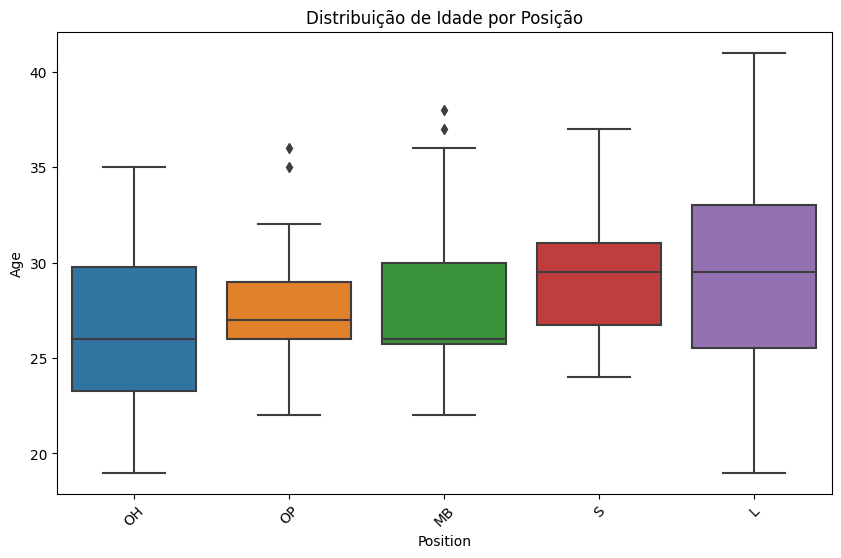

In [8]:
# Distribuição de idade por posição
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Age', data=df)
plt.title('Distribuição de Idade por Posição')
plt.xticks(rotation=45)
plt.show()


**Box plots para cada característica por posição**

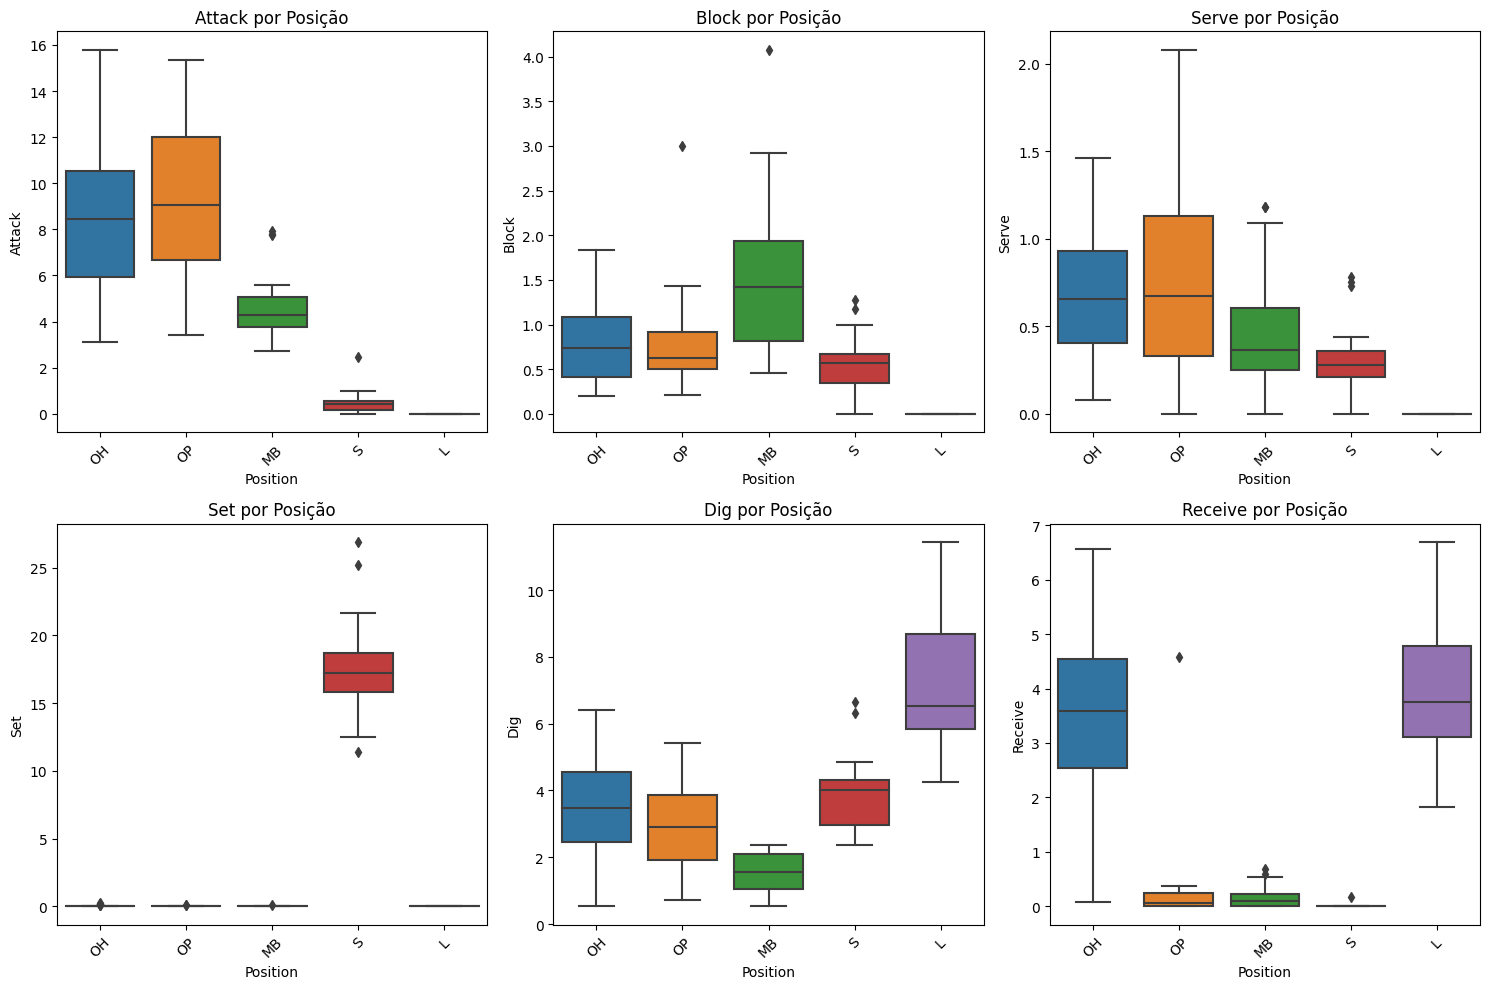

In [9]:
# Box plots para cada característica por posição
plt.figure(figsize=(15, 10))
features = ['Attack', 'Block', 'Serve', 'Set', 'Dig', 'Receive']

for i, feature in enumerate(features, 1):
   plt.subplot(2, 3, i)
   sns.boxplot(x='Position', y=feature, data=df)
   plt.title(f'{feature} por Posição')
   plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Matriz de correlação

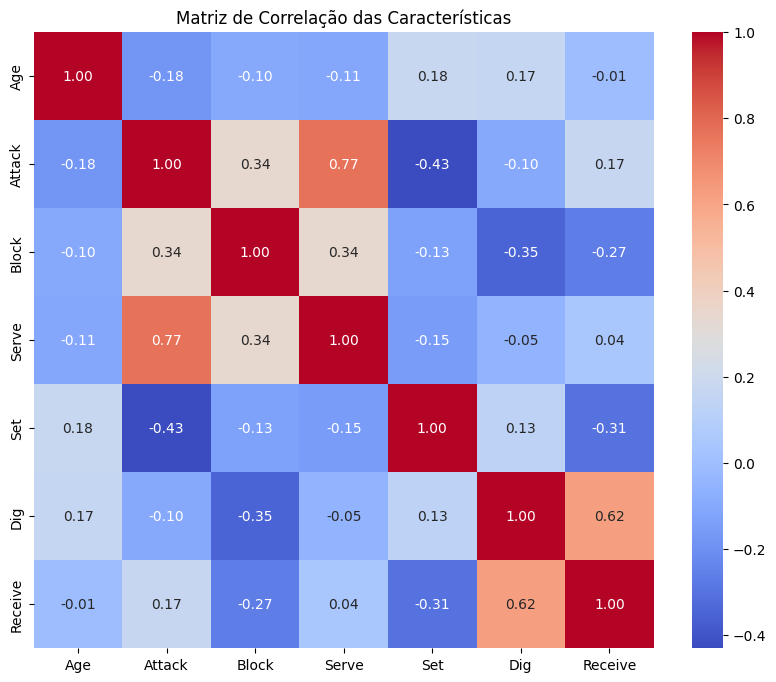

In [10]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig', 'Receive']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Características')
plt.show()

**Particionando e dispensando atributos que não vão ser úteis**

In [11]:
#Particionando e dispensando atributos que não vão ser úteis
X = df.drop(['Player', 'Country', 'Position', 'Age'], axis=1)
y = df['Position']

**Encode da variável target**

In [12]:
# Encode da variável target
le = LabelEncoder()
y = le.fit_transform(y)


**Normalização dos dados**

In [13]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split dos dados**

In [14]:
# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

**Rodando algoritmo Random Forest**

In [15]:
# 1. Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# 2. Previsões e avaliação
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_predictions, 
                          target_names=le.classes_))


Random Forest Results:
              precision    recall  f1-score   support

           L       1.00      1.00      1.00         3
          MB       0.80      1.00      0.89         8
          OH       1.00      0.93      0.96        14
          OP       1.00      0.83      0.91         6
           S       1.00      1.00      1.00         2

    accuracy                           0.94        33
   macro avg       0.96      0.95      0.95        33
weighted avg       0.95      0.94      0.94        33



In [17]:
# 2. Importância das features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
   feature  importance
5  Receive    0.252668
0   Attack    0.243337
4      Dig    0.153607
1    Block    0.136374
3      Set    0.113998
2    Serve    0.100015


In [18]:
# 3. Cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.85185185 0.96153846 1.         0.88461538 0.84615385]
Mean CV score: 0.9088319088319088


**Definindo função**

In [19]:
# 4. Função de predição 
def predict_position(model, scaler, le, player_stats):
    """
    Prevê a posição de um jogador com base em suas estatísticas
    
    Args:
        model: Modelo treinado
        scaler: Scaler ajustado
        le: LabelEncoder ajustado
        player_stats: Dict com estatísticas numéricas do jogador
    """
    # Criar DataFrame com as mesmas colunas do treino
    stats_df = pd.DataFrame([player_stats], columns=X.columns)
    
    # Normalizar dados
    stats_scaled = scaler.transform(stats_df)
    
    # Fazer previsão
    position_encoded = model.predict(stats_scaled)
    position = le.inverse_transform(position_encoded)
    
    # Obter probabilidades
    probabilities = model.predict_proba(stats_scaled)
    
    return position[0], probabilities[0]




In [20]:
# 5. Exemplo de uso
new_player = {
    'Age': 25,
    'Attack': 0.65,
    'Block': 0.45,
    'Serve': 0.55,
    'Set': 0.30,
    'Dig': 0.40,
    'Receive': 0.50
}

In [21]:
position, probs = predict_position(rf_model, scaler, le, new_player)
print("\nPredicted position:", position)
print("Probabilities:", dict(zip(le.classes_, probs)))



Predicted position: MB
Probabilities: {'L': 0.06, 'MB': 0.56, 'OH': 0.04, 'OP': 0.06, 'S': 0.28}


In [22]:
def analyze_position_characteristics(df):
    """Analisa características médias por posição"""
    stats_by_position = df.groupby('Position').agg({
        'Age': 'mean',
        'Attack': 'mean',
        'Block': 'mean',
        'Serve': 'mean',
        'Set': 'mean',
        'Dig': 'mean',
        'Receive': 'mean'
    }).round(2)
    
    return stats_by_position

position_stats = analyze_position_characteristics(df)
print("\nMédia de estatísticas por posição:")
print(position_stats)


Média de estatísticas por posição:
            Age  Attack  Block  Serve    Set   Dig  Receive
Position                                                   
L         29.31    0.00   0.00   0.00   0.00  7.10     3.84
MB        28.03    4.54   1.53   0.47   0.00  1.53     0.18
OH        26.45    8.38   0.80   0.71   0.02  3.58     3.49
OP        27.68    9.33   0.78   0.80   0.01  2.92     0.28
S         29.62    0.54   0.56   0.32  17.88  3.94     0.01
